# Übungsblatt 3: Constraint Satisfaction Problems

## Aufgabe: Constraint Satisfaction

Constraint Satsfaction erlaubt das Folgern und Ableiten von Zuweisungen an Variablen, die konsistent bzw.
inkonsistent mit den Bedingungen (constraints) der Zielkonfiguration sind. Die Bedingungen werden durch
Gleichungen und Ungleichungen repräsentiert. Zwei Constraint Propagation Methoden sollen im Folgen-
den untersucht werden: Backtracking und arc consistency. Die Verfahren unterscheiden sich bezüglich ihrer
Vollständigkeit der Inferenz und ihres Rechenaufwandes.

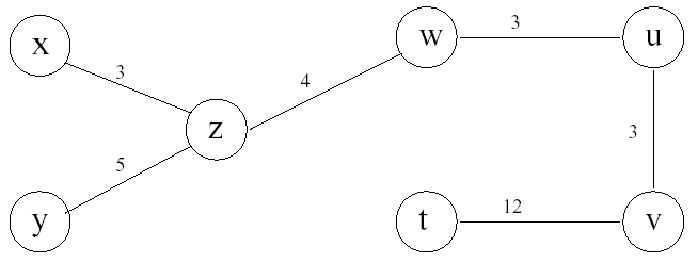

Betrachten Sie nun obiges Constraintnetz. Jeder Knoten stellt eine Variable dar und jede Kante (arc) ist
mit einer Zahl beschriftet. Die Variablen können nur Zahlen zwischen $0$ und $9$ annehmen (inklusive $0$ und
$9$). Jede Kante repräsentiert eine Bedingung, die die beiden durch die Kante verbundenen Variablen erfüllen
müssen. Die Bedingung besteht darin, dass jede Variable den gleichen Wert modulo der Kantenzahl haben
muss. Zum Beispiel repräsentiert die Kante $(x, z)$ mit dem Wert $3$ die Bedingung: $x$ mod $3$ = $z$ mod $3$ .
Sie kann erfüllt werden durch die Zuweisungen $x = 2$, $z = 2$, oder $x = 5$, $z = 2$ oder $x = 7$, $z = 1$.
Für obigen Graphen seien die Belegungen $x = 2$, $y = 0$ und $t = 0$ bereits vorhanden. 


### 
Geben Sie die Variablenbelegungen für *backtracking* an.

=== BEGIN MARK SCHEME ===

$x = 2$, $y = 0$, $t = 0$

$z = [5]: 5$\
&emsp;$w = [1,5,9]: 1$\
&emsp;&emsp;$u = [1,4,7]: 1$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = [4,7]: 4$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = [7]: 7$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = []:$ **BT**\
&emsp;$w = [5,9]: 5$\
&emsp;&emsp;$u = [2,5,8]: 2$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = [5,8]: 5$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = [8]: 8$\
&emsp;&emsp;&emsp;$v = []:$ **BT**\
&emsp;&emsp;$u = []:$ **BT**\
&emsp;$w = [9]: 9$\
&emsp;&emsp;$u = [0,3,6,9]: 0$\
&emsp;&emsp;&emsp;$v = [0]: 0$

$z = 5$, $w = 9$, $u = 0$, $v = 0$


=== END MARK SCHEME ===

### 
Geben Sie die Variablenbelegungen für *arc consistency* an.

=== BEGIN MARK SCHEME ===

$x = 2$, $y = 0$, $t = 0$

$z = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$w = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$


1. Check Arc-Consistency $z-x$: 

$$
    x \mod 3 = z \mod 3 \\
    \Leftrightarrow z \mod 3 = 2
$$ 

$z = [2, 5, 8]$\
$w = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$

2. Check Arc-Consistency $z-y$: 

$$
    z \mod 5 = y \mod 5 \\
    \Leftrightarrow z \mod 5 = 0
$$ 

$z = [5]$\
$w = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$

3. Check Arc-Consistency $v-t$: 

$$
    v \mod 12 = t \mod 12 \\
    \Leftrightarrow v \mod 12 = 0\\
    v = 0
$$ 

$z = [5]$\
$w = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$u = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$v = [0]$

4. Check Arc-Consistency $u-v$:
$$
    u \mod 3 = v \mod 3 \\
    \Leftrightarrow u \mod 3 = 0
$$ 

$z = [5]$\
$w = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$\
$u = [0, 3, 6, 9]$\
$v = [0]$

5. Check Arc-Consistency $w-z$:
$$
    w \mod 4 = z \mod 4 \\
    \Leftrightarrow w \mod 4 = 1
$$ 

$z = [5]$\
$w = [1, 5, 9]$\
$u = [0, 3, 6, 9]$\
$v = [0]$

6. Check Arc-Consistency $w-u$:
$$
    w \mod 3 = u \mod 3 \\
    \Leftrightarrow [1, 2, 0] = [0, 0, 0, 0]\\
$$ 

$z = [5]$\
$w = [9]$\
$u = [0, 3, 6, 9]$\
$v = [0]$



=== END MARK SCHEME ===

## Programmieraufgabe: CSP-Solver

In dieser Aufgabe werden Sie einen einfachen CSP-Solver selbst in Python implementieren. Dazu steht Ihnen unten erneut eine Programmiervorlage zur Verfügung. Diese Implementiert unter anderem eine Problemrepräsentation sowie eine Basisklasse für die von Ihnen zu implementierenden Constaints.

*Hinweis*: Um die benötigten Datentypen besser zu visualisieren, haben wir hier *Type-Hints* verwendet, welche die Funktionsparameter und Variablen mit Typbezeichnungen versehen. Diese werden, anders als in Sprachen wie C++ oder Java **nicht** vom Python-Interpreter erzwungen, können aber als Hinweise dienen, welche Parameter hier übergeben werden sollen.


In [ ]:
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

# Type hints
V = TypeVar('V') # variable type (any object)
D = TypeVar('D') # domain type (any object)
  
  
class Constraint(Generic[V, D], ABC):
    """
    Base class for all constraints
    """
    def __init__(self, variables: List[V]) -> None:
        """
        Init the Constraint with the Variables it's between
        """
        self.variables = variables
  
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        """
        Must be overridden by subclasses
        """
        


class CSP(Generic[V, D], ABC):
    """
    Class representing a constaint satisfaction problem.
    A constraint satisfaction problem consists of variables of type V
    that have ranges of values known as domains of type D and constraints
    that determine whether a particular variable's domain selection is valid
    """
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        # list of variables to be constrained
        self.variables: List[V] = variables 
        # domain of each variable
        self.domains: Dict[V, List[D]] = domains 
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
  
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)
                
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        """
        Check if the value assignment is consistent by checking all constraints
        for the given variable against it
        """
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True
    
    @abstractmethod
    def solve(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        """
        Abstract method to solve the CSP. Must be implemented by subclasses.
        
        assignment is an optional partial assignment of the variables used for recursion is required.
        """


### 
Implementieren zunächst Sie eine `Constraint`-Subklasse für das in der Vorlesung behandelte Färbeproblem.
<div>
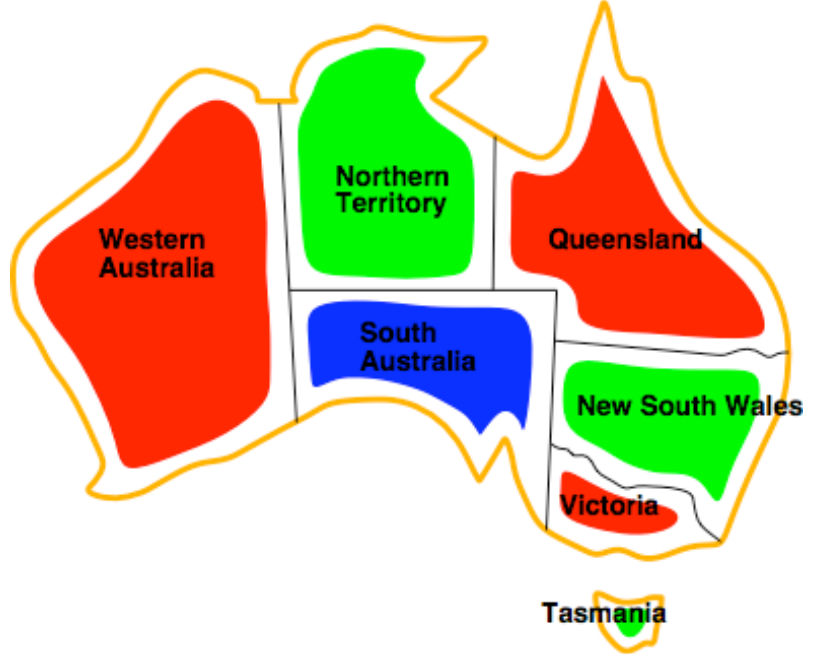 
</div>

Ihre Subklasse sollte dazu von der Klasse `Constraint` erben und die abstrakte Methode `satisfied` implementieren.

*Hinweis*: durch Aufruf von `super()` können Sie auf Methoden der Oberklasse zugreifen. Dieses ist inbesondere wichtig, um den Konstruktor (`__init__`) der Basisklasse aufzurufen (Beispiel: `super().__init__(variables)`)

In [ ]:
### BEGIN SOLUTION
from typing import Dict, List, Optional
  
class MapColoringConstraint(Constraint[str, str]):
    def __init__(self, place1: str, place2: str) -> None:
        super().__init__([place1, place2])
        self.place1: str = place1
        self.place2: str = place2
  
    def satisfied(self, assignment: Dict[str, str]) -> bool:
        # If either place is not in the assignment then it is not
        # yet possible for their colors to be conflicting
        if self.place1 not in assignment or self.place2 not in assignment:
            return True
        # check the color assigned to place1 is not the same as the
        # color assigned to place2
        return assignment[self.place1] != assignment[self.place2]
### END SOLUTION

### 
Implementieren Sie nun einen Solver, der das Färbeproblem mittels Backtracking löst. Die entsprechende Subklasse ist unten bereits vordefiniert. Sie müssen die Implementation der Methode `solve` vervollständigen.  

In [ ]:
class BacktrackingCSP(CSP):
    def solve(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        ### BEGIN SOLUTION
        # assignment is complete if every variable is assigned (our base case)
        if len(assignment) == len(self.variables):
            return assignment

        # get all variables in the CSP but not in the assignment
        unassigned: List[V] = [v for v in self.variables if v not in assignment]

        # get the every possible domain value of the first unassigned variable
        first: V = unassigned[0]
        for value in self.domains[first]:
            local_assignment = assignment.copy()
            local_assignment[first] = value
            # if we're still consistent, we recurse (continue)
            if self.consistent(first, local_assignment):
                result: Optional[Dict[V, D]] = self.solve(local_assignment)
                # if we didn't find the result, we will end up backtracking
                if result is not None:
                    return result
        ### END SOLUTION
        return None

### 
Implementieren Sie nun das Färbeproblem mit Ihrer Constraint-Klasse und nutzen Sie Ihren Solver um das Problem zu lösen.

In [ ]:
variables: List[str] = ["Western Australia", "Northern Territory", "South Australia",
                         "Queensland", "New South Wales", "Victoria", "Tasmania"]
domains: Dict[str, List[str]] = {}

### BEGIN SOLUTION
for variable in variables:
    domains[variable] = ["red", "green", "blue"]
csp: CSP[str, str] = BacktrackingCSP(variables, domains)
csp.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
csp.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
csp.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
csp.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
csp.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
csp.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
csp.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
csp.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
csp.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
csp.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))

solution = csp.solve()
if solution is None:      
    print("No solution found!")  
else:         
    print(solution)
### END SOLUTION
                

## Programmieraufgabe: Sudoku

Nutzen Sie Ihren CSP-Solver um das Spiel [Sudoku](https://de.wikipedia.org/wiki/Sudoku) zu lösen. Einen Zufallsgenerator für Sudokus können Sie mit dem Kommando

```bash
conda install pip
pip install sudokugen 
```

installieren und wie unten gegeben benutzen.

### 
Gegeben sei zunächst folgendes Sudoku-Feld:
```
 |1 3 5 | 7 9 2 | 4 6 8|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |------|-------|------|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |------|-------|------|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |2 4 6 | 8 1 2 | 5 7 9|
```

Wir suchen nach einer Lösung. Wie hoch ist der erste Verzweigungsfaktor im Suchbaum?

In [ ]:
### BEGIN SOLUTION
# Kommt auf die Suche an. Angenommen in einer Verzweigung wird entschieden w
b=(2*5*2+3*7)*9
print(b)
### END SOLUTION

In [ ]:
import numpy as np
from sudokugen.generator import generate, Difficulty

#level = Difficulty.EASY
#level = Difficulty.MEDIUM
level = Difficulty.HARD

(A,B) = generate(difficulty=level)
board = np.array(A).reshape(9,9)
solution = np.array(B)

print('Board:')
print(board)
print('Provided Solution:')
print(solution)

### 
Nutzen Sie Ihre Implementation aus der vorherigen Aufgabe um eine CSP-Definition für Sudoku zu schreiben und eine Lösung auszugeben. 
Implementieren Sie Ihre Constraints wieder als Subklassen der `Constraint`-Klasse. Wenn Sie Ihren Backtracking-Solver aus der vorherigen Aufgabe korrekt implementiert haben, können Sie diesen ohne Änderungen weiterhin verwenden.

In [ ]:
### BEGIN SOLUTION
from typing import Dict, List, Optional, Tuple
  
class AllDifferentConstraint(Constraint[str, str]):
    def __init__(self, coordinates: List[Tuple[int]]) -> None:
        super().__init__(coordinates)
        self.coordinates = coordinates
  
    def satisfied(self, assignment: Dict[Tuple[int], int]) -> bool:
        satis = False
        values = []
        for c in self.coordinates:
            if c in assignment:
                values.append(assignment[c])
                
        return len(values) == len(set(values)) 
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
#####
# Helper functions
#####
import time
from copy import deepcopy
from itertools import combinations

def row_vars(n):
    """
    Receive the nth row as list of variables
    n must be in range [0,9)
    """
    return [(n,i) for i in range(9)]

def col_vars(n):
    """
    Receive the nth col as list of variables
    n must be in range [0,9)
    """
    return [(i,n) for i in range(9)]

def square_vars(row, col):
    """
    Receive the nth,mth square as list of variables
    n must be in range [0,3)
    m must be in range [0,3)
    """
    return [(i%3+row*3, i//3+col*3) for i in range(9)]


variables = []
domains: Dict[Tuple[int], List[int]] = {}

default_domain = list(range(1, 10))

# fill in the variables
for i in range(9):
    for j in range(9):
        variable = (i, j)
        variables.append(variable)
        if board[i,j] == 0:
            domains[variable] = deepcopy(default_domain)
        else:
            domains[variable] = [board[i,j]]

csp = BacktrackingCSP(variables, domains)

# Add constaints
# rows and cols constraints (all different)
for i in range(9):
    row = row_vars(i)
    #for r in combinations(row_vars(i), 2):
    for j, r in enumerate(row):
        for r2 in row[j+1:]:
            #print(r, r2)
            csp.add_constraint(AllDifferentConstraint((r, r2)))
    col = col_vars(i)
    #for c in combinations(col_vars(i), 2):
    for j, c in enumerate(col):
        for c2 in col[j+1:]:
            csp.add_constraint(AllDifferentConstraint((c, c2)))
    #csp.add_constraint(AllDifferentConstraint(row_vars(i)))
    #csp.add_constraint(AllDifferentConstraint(col_vars(i)))
    
# square constraints (all different)
for row in range(0, 3):
    for col in range(0, 3):
        #for s in combinations(square_vars(row, col), 2):
        sq = square_vars(row, col)
        for j, s in enumerate(sq):
            for s2 in sq[j+1:]:
                csp.add_constraint(AllDifferentConstraint((s, s2)))
        #csp.add_constraint(AllDifferentConstraint(square_vars(row, col)))

print("solving...")
tic = time.time()
solution = deepcopy(csp).solve()
toc = time.time() - tic
if solution is None:      
    print("No solution found!")  
else:         
    my_solution = np.zeros_like(board)
    for (i,j), v in solution.items():
            my_solution[i,j] = v
    print(my_solution)
print("run time", toc)
### END SOLUTION

### 
Sie werden für komplexere Sudokus (Difficulty `MEDIUM` oder `HARD`) feststellen, dass der reguläre Backtracking-Solver sehr lange benötigt. Erweitern Sie Ihren CSP-Solver um den lokalen-Konsistenz-Algorithmus `AC3` aus der Vorlesung zur Reduzierung des Suchraums. Vergleichen Sie die Laufzeiten zur Lösung der Sudokus mit und ohne `AC3`.

In [ ]:
### BEGIN SOLUTION
def get_arcs(csp: CSP):
    arcs = set()
    for v, cs in csp.constraints.items():
        for c in cs:
            for cv in c.variables:
                if v != cv:
                    arc = (v, cv, c)
                    arcs.add(arc)
    return arcs

def get_neigbors(csp: CSP, v: V):
    for c in csp.constraints[v]:False
        for cv in c.variables:
            if cv != v:
                yield cv, c
        

def AC3(csp):
    queue = get_arcs(csp)
        #queue = {(Xi, Xk) for Xi in csp.variables for Xk in csp.neighbors[Xi]}
    checks = 0
    while queue:
        Xi, Xj, C = queue.pop()
        revised, checks = revise(csp, Xi, Xj, C, checks)
        if revised:
            if not csp.domains[Xi]:
                return False, checks  # Domain is empty -> CSP is inconsistent
            for Xk, c in get_neigbors(csp, Xi):
                if Xk != Xj:
                    queue.add((Xk, Xi, c))
    return True, checks  # CSP is satisfiable


def revise(csp, Xi, Xj, C, checks=0):
    """Return true if we remove a value."""
    revised = False
    for x in csp.domains[Xi]:
        # If Xi=x conflicts with Xj=y for every possible y, eliminate Xi=x
        # if all(not csp.constraints(Xi, x, Xj, y) for y in csp.curr_domains[Xj]):
        conflict = True
        for y in csp.domains[Xj]:
            if C.satisfied({Xi: x, Xj: y}):
                conflict = False
            checks += 1
            if not conflict:
                break
        if conflict:
            #print("conflict, removing", x, "from domain of", Xi,  csp.domains[Xi])
            csp.domains[Xi].remove(x)
            #print("domain after", csp.domains[Xi])
            revised = True
    return revised, checks


### END SOLUTION

In [ ]:
## Example from lecture
variables: List[str] = ["Western Australia", "Northern Territory", "South Australia",
                         "Queensland", "New South Wales", "Victoria", "Tasmania"]
domains: Dict[str, List[str]] = {}

for variable in variables:
    domains[variable] = ["red", "green", "blue"]
csp_austr: CSP[str, str] = BacktrackingCSP(variables, domains)
csp_austr.add_constraint(MapColoringConstraint("Western Australia", "Northern Territory"))
csp_austr.add_constraint(MapColoringConstraint("Western Australia", "South Australia"))
csp_austr.add_constraint(MapColoringConstraint("South Australia", "Northern Territory"))
csp_austr.add_constraint(MapColoringConstraint("Queensland", "Northern Territory"))
csp_austr.add_constraint(MapColoringConstraint("Queensland", "South Australia"))
csp_austr.add_constraint(MapColoringConstraint("Queensland", "New South Wales"))
csp_austr.add_constraint(MapColoringConstraint("New South Wales", "South Australia"))
csp_austr.add_constraint(MapColoringConstraint("Victoria", "South Australia"))
csp_austr.add_constraint(MapColoringConstraint("Victoria", "New South Wales"))
csp_austr.add_constraint(MapColoringConstraint("Victoria", "Tasmania"))

csp_austr.domains['Northern Territory'] = ["red"]
csp_austr.domains['Victoria'] = ["blue"]
#csp_austr.domains['New South Wales'] = ["green"]
#csp_austr.domains['Queensland'] = ["blue"]
#csp_austr.domains['South Australia'] = ["blue", "green", "red"]
#csp_austr.domains['Western Australia'] = ["blue", "green"]
print("domains", csp_austr.domains)
satisfiable, checks = AC3(csp_austr)
print()
if not satisfiable:
    print("CSP not satisfiable!")
print("remaining domains", csp_austr.domains)

In [ ]:
# process the sudoku with AC3
csp_ac = deepcopy(csp)
tic = time.time()
satisfiable, checks = AC3(csp_ac)
print("AC3 took", time.time()-tic, "seconds")
if not satisfiable:
    print("CSP not satisfiable!")
print(csp.domains)

tic = time.time()
solution = csp_ac.solve()
toc = time.time() - tic
if solution is None:      
    print("No solution found!")  
else:         
    my_solution = np.zeros_like(board)
    for (i,j), v in solution.items():
            my_solution[i,j] = v
    print(my_solution)
print("run time", toc)

### Zusatzaufgabe
Im Paket [python-constraint](https://pypi.org/project/python-constraint/) finden Sie optimierte Implementationen der gängigen CSP-Solver. Das Paket können Sie mit 

```bash
conda install python-constraint
```

installieren.

Nutzen Sie die Funktionen des neuen Paketes um eine optimierte Variante des Sudoku-Solvers zu implementieren, welche nicht nur eine, sondern **alle** möglichen Lösungen zurückliefert. Geben Sie die Anzahl der ermittelten Lösungen an.

In [ ]:
import constraint as csp
### BEGIN SOLUTION
#####
# Helper functions
#####

def row_vars(n):
    """
    Receive the nth row as list of variables
    n must be in range [0,9)
    """
    return [(n,i) for i in range(9)]

def col_vars(n):
    """
    Receive the nth col as list of variables
    n must be in range [0,9)
    """
    return [(i,n) for i in range(9)]

def square_vars(row, col):
    """
    Receive the nth,mth square as list of variables
    n must be in range [0,3)
    m must be in range [0,3)
    """
    return [(i%3+row*3, i//3+col*3) for i in range(9)]

# Define CSP
problem = csp.Problem()

for i in range(9):
    for j in range(9):
        if board[i,j] == 0:
            problem.addVariable((i,j), [n for n in range(1,10)])
        else:
            problem.addVariable((i,j), [board[i,j]])

# Add constaints

# rows and cols constraints (all different)
for i in range(9):
    problem.addConstraint(csp.AllDifferentConstraint(), row_vars(i))
    problem.addConstraint(csp.AllDifferentConstraint(), col_vars(i))
    
# square constraints (all different)
for row in range(0, 3):
    for col in range(0, 3):
        problem.addConstraint(csp.AllDifferentConstraint(), square_vars(row, col))
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
my_solution = np.zeros_like(board)
csp_solution = problem.getSolution()

for (i,j), v in csp_solution.items():
        my_solution[i,j] = v

print('Solution:')
print(my_solution)
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
print('Get every solution')
nsolutions = 0
for csp_solution in problem.getSolutionIter():
    my_solution = np.zeros_like(board)
    for (i,j), v in csp_solution.items():
        my_solution[i,j] = v
    
    if (my_solution == solution).all():
        print('Same as provided %d:' % nsolutions)
        print(my_solution)
        
    nsolutions+=1
    
print('total number of solutions:', nsolutions)
### END SOLUTION